# Chapter 16: Constrained Least Squares 

## 16.2 Solution 

**Optimality conditions via Lagrange multipliers**. 

We can write the CLS problem with the constraints given as a list of $p$ scalar equality constraints: 

\begin{align}
\text{minimize} \quad & ||Ax-b||^2\\
\text{subject to} \quad & c^T_i x = d_i, \space \space \space i=1,\dots,p,
\end{align}

where $c_i^T$ are the rows of $C$. We form the *Langrangian function*

\begin{align}
L(x,z) = ||Ax-b||^2 + z_1(c^T_1 x - d_1) + \dots + z_p(c^T_p x - d_p),
\end{align}

where $z$ is the $p$-vector of *Lagrange multipliers*. 

The method of Lagrange multipliers tells us that we have $\hat x$ as the solution of the CLS problem and $\hat z$ Lagrange multipliers associated that satisfy 

\begin{align}
\frac{\partial L}{\partial x_i}(\hat x, \hat z) = 0, \quad i = 1, \dots,n, \qquad 
\frac{\partial L}{\partial z_i}(\hat x, \hat z) = 0, \quad i = 1, \dots,p.
\end{align}

These are the *optimality conditions* for the CLS problem. Any solution of CLS must satisfy them. We see that the opimality conditions can be expressed as a set of linear equations. 

The second set of equations in the optimality conditions can be written as the equality constraints $C\hat x = d$. 

The first set of equations can be written in matrix-vector form as 
\begin{align}
2(A^T A)\hat x - 2A^Tb + C^T \hat z = 0.
\end{align}

Combining this set of linear equations with the equality constraints mentioned above, we can write the optimality conditions as one set of $n+p$ linear equations in the variables $(\hat x, \hat z)$:

\begin{align}
\begin{bmatrix} 2A^TA & C^T \\ C & 0 \end{bmatrix}
\begin{bmatrix} \hat x \\ \hat z \end{bmatrix} 
= 
\begin{bmatrix} 2 A^T b \\ d \end{bmatrix}
\end{align}

These equations are called hte *KKT euqations* for the CLS problem. 

Below we implement the function `cls_solve_kkt`, which finds the CLS solution by forming the KKT system and solving it. We allow the the `b` and `d` matrices, so this function can also solve multiple problems with the same $A$ and $C$. 

In [96]:
function cls_solve_kkt(A,b,C,d)
    m,n = size(A)
    p,n = size(C)
    KKT = [2*A'*A   C'        ;
           C        zeros(p,p)];
    xzhat = KKT \ [2*A'*b ; d]
    xhat = xzhat[1:n, :]
    zhat = xzhat[n+1:end, :]
    return xhat, zhat 
end; 

**Note: Invertibility of KKT matrix** The KKT matrix is invertible iff 

\begin{align}
\textit{C has linearly independent rows, and } 
\begin{bmatrix} A \\ C \end{bmatrix}
\textit{has linearly independent columns.}
\end{align}

The first condition requires that $C$ is wide or square, i.e. there are fewer constraints than variables. The second condition depends on both $A$ and $C$ and can be satisfied even when the columns of A are linearly dependent. 

When the conditions hold, the CLS problem has the (unique) solution $\hat x$, given by 

\begin{align}
\begin{bmatrix} \hat x \\ \hat z \end{bmatrix} =
\begin{bmatrix} 2A^TA & C^T \\ C & 0 \end{bmatrix}^{-1}
\begin{bmatrix} 2 A^T b \\ d \end{bmatrix}
\end{align}

## 16.3 Solving constrained least squares problems 

**Solving CLS via QR.**  

We can compute the solution above of the CLS problem by forming and solving the KKT euqations 

**Algorithm 16.1** CLS VIA KKT EQUATIONS
1. *Form Gram matrix.* ($A^T A$)
2. *Solve KKT equations.* by QR factorization and back substitution. 

The second step cannot fail provided the assumption about invertibility above holds. \
Complexity of the algorithm is $mn^2$ for step 1, and $2(n+p)^3$ for step 2. 

Total Complexity: $mn^2 + 2(n+p)^3$. Since we assume C is wide, it is implied that $p < n$, so we can reduce the second term to $n^3$ complexity.


We now give a method for solving CLS that generalizes the QR factorization method for LS problems. 

We start by rewriting the KKT euqations with a new variable $w = \hat z -2d.$\
We begin with the original equations: 

\begin{align}
& 2(A^T A)\hat x - 2A^Tb + C^T \hat z = 0, \qquad C\hat x = d \\ 
&= 2(A^T A)\hat x + C^T \hat z = 2A^Tb, \qquad C\hat x = d
\end{align}

We multiplied the equation on the right ($C\hat x = d$) by $2C^T$ to get $2C^T C\hat x = 2 C^T d$, which is equivalent to $2C^T C\hat x - 2 C^T d = 0.$ \
We add this result to the first equation on the left and replace with the variable $w$ to get 

\begin{align}
& 2(A^T A)\hat x + 2C^T C\hat x + C^T \hat z - 2 C^T d = 2A^Tb \\
&= 2(A^T A + C^T C) \hat x + C^T(\hat z - 2d) = 2A^Tb\\
&= 2(A^T A + C^T C) \hat x + C^Tw = 2A^Tb
\end{align}

Next we use QR factorization 

\begin{align}
\begin{bmatrix} A \\ C \end{bmatrix} = QR = \begin{bmatrix} Q_1 \\ Q_2 \end{bmatrix} R
\end{align}

to simplify the equation $(3)$ above. 

This factorization exists because the stacked matrix has linearly independent columns. We partition $Q$ into $Q_1$ and $Q_2$ of size $m \times n$ and $p \times n$ respectively. 

We can then make the substitutions 
\begin{align}
A &= Q_1 R,\\
C &= Q_2 R,\\
A^T A + C^T C &= R^T R 
\end{align}

which gives us the equations

\begin{align}
2(R^T R) \hat x + R^T Q_2^T w = 2 R^T Q_1^T b, \qquad Q_2 R \hat x = d.
\end{align}

We multiply the first equation on the left by $R^{-T}$ to get 

\begin{align}
& 2(R^T R) \hat x + R^T Q_2^T w = 2 R^T Q_1^T b\\
= \space & 2(R^T R^{-T} R) \hat x + R^T R^{-T} Q_2^T w = 2 R^T R^{-T} Q_1^T b\\
= \space & 2 R \hat x + Q_2^T w = 2 Q_1^T b\\
= \space & 2 R \hat x  = 2 Q_1^T b - Q_2^T w\\
= \space & R \hat x  = Q_1^T b - (1/2)Q_2^T w\\
\end{align}

Substituting the expression from our other refactored KKT equation ($Q_2 R \hat x = d$), we get 

\begin{align}
& R \hat x  = Q_1^T b - (1/2)Q_2^T w \\
= \space & 2R \hat x  = 2Q_1^T b - Q_2^T w \\
= \space & 2Q_2 R \hat x =  2 Q_2 Q_1^T b - Q_2 Q_2^T w  \\
= \space & 2d = 2 Q_2 Q_1^T b - Q_2 Q_2^T w  \\
= \space & Q_2 Q_2^T w = 2 Q_2 Q_1^T b - 2d  \\
\end{align}

Using our assumptions about the invertability of the KKT matrix, we can show that $Q^T_2 = R^{-T}C^T$ has linearly independent columns. 
- Note: Suppose that $Q^T_2 z = R^{-T}C^Tz =0.$ Multiplying with $R^T$ gives $C^T = 0$. Since $C$ has linearly independent rows, this implies that $z=0$ and we conclude that the columns of $Q^T_2$ are linearly independent.

Then $Q^T_2$ has a QR factorization $Q^T_2 = \tilde Q \tilde R$ 

Substituting this in our last equation we get 

\begin{align}
& Q_2 Q_2^T w = 2 Q_2 Q_1^T b - 2d \\
= \space & (\tilde Q \tilde R)^T (\tilde Q \tilde R) w = 2(\tilde Q \tilde R)^T Q_1^T b - 2d  \\
= \space & \tilde R^T \tilde Q^T \tilde Q \tilde R w = 2 \tilde R^T \tilde Q^T Q_1^T b - 2d  \\
= \space & \tilde R^T \tilde R w = 2 \tilde R^T \tilde Q^T Q_1^T b - 2d  \\
\end{align}

We can then multiply by $\tilde R^{-T}$ to rewrite as

\begin{align}
& \tilde R^T \tilde R w = 2 \tilde R^T \tilde Q^T Q_1^T b - 2d  \\
= \space & \tilde R^{-T} \tilde R^T \tilde R w = 2 \tilde R^{-T} \tilde R^T \tilde Q^T Q_1^T b - 2\tilde R^{-T}d  \\
= \space & \tilde R w = 2  \tilde Q^T Q_1^T b - 2\tilde R^{-T}d  \\
\end{align}

LAST PART! 

Now that we have 

\begin{align}
\tilde R w = 2  \tilde Q^T Q_1^T b - 2\tilde R^{-T}d 
\end{align}

We can compute $ 2\tilde R^{-T}d $ using forward substitution, then form the right-hand side, then solve for $w$ using back substitution. Once we know $w$, we can find $\hat x$ from $R \hat x  = Q_1^T b - (1/2)Q_2^T w$.

**Algorithm 16.2** CLS VIA QR FACTORIZATION 
1. *QR factorizations.* Compute the QR factorizations 
\begin{align}
\begin{bmatrix} A \\ C \end{bmatrix} = \begin{bmatrix} Q_1 \\ Q_2 \end{bmatrix} R, \qquad Q^T_2 = \tilde Q \tilde R
\end{align}

2. Compute $\tilde R^{-T} d$ using forward substitution 
3. Form right-hand side and solve for $w$ via back substitution. 
\begin{align}
\tilde R w = 2 \tilde Q^T Q_1^T b - 2 \tilde R^{-T} d 
\end{align}
4. *Compute $\hat x$.* Form right-hand side and solve via back substitution.
\begin{align}
 R \hat x  = Q_1^T b - (1/2)Q_2^T w
\end{align}


Complexity: 
1. Step 1: QR factorizations of $(m+o) \times n$ and $n \times p$ matrix, $2(m+p)n^2 + 2np^2$ flops 
2. Step 2: $p^2$ flops 
3. Step 3: $Q^T_1b$ = $2mn$ flops, multiply by $\tilde Q^T$ = $2pn$ flops, solve for $w$ = $p^2$ flops 
4. Step 4: Righthand side = $2mn+2pn$ flops, solve for $\hat x$ = $n^2$ flops

Step 1 has biggest complexity, final complexity is $2(m+p)n^2 + 2np^2$, but we assume that $p \leq n \leq m+p$, so we can reduce the order to $(m+p)n^2$

In [68]:
using LinearAlgebra
function cls_solve(A,b,C,d)
    # precompute 
    m,n = size(A)
    p,n = size(C)
    # step 1 
    Q,R = qr([A ; C])
    Q = Matrix(Q)
    Q1 = Q[1:m, :]
    Q2 = Q[m+1: end, :]
    Qtilde, Rtilde = qr(Q2')
    Qtilde = Matrix(Qtilde)
    # step 2 
    step2 = (Rtilde')\d
    # step 3
    righthand3 = 2*Qtilde'*Q1'*b - 2*step2
    w = Rtilde \ righthand3
    # step 4
    righthand4 = Q1'b - (1/2)*Q2'*w
    xhat = R \ righthand4
    return xhat
end;

In [95]:
# compare cls_solve and cls_solve_kkt
m = 10; p = 1000; n = 1000;
A = randn(m,n); C = randn(p,n);
b = randn(m)
d = randn(p)

@time x = cls_solve(A,b,C,d);
@time xkkt, zhat = cls_solve_kkt(A,b,C,d);

norm(x-xkkt)

  0.118169 seconds (42 allocations: 77.777 MiB)
  0.029523 seconds (70 allocations: 76.365 MiB)


2.0672138557583393e-10

In [89]:
# check equality constraint is satisified for both solutions
norm(C*x - d), norm(C*xkkt - d)

(7.546989960068085e-11, 1.2547662226866219e-7)

**Sparse constrained least squares.** One potential problem with forming the KKT matrix is that the Gram matrix $A^T A$ can be far less sparse than the matrix A. Instead, we can form the square set of m+n+p linear equations 

\begin{align}
\begin{bmatrix}
0 & A^T & C^T \\
A & -(1/2)I & 0 \\
C & 0 & 0 
\end{bmatrix}
\begin{bmatrix}
\hat x \\ \hat y \\ \hat z 
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ b \\ d
\end{bmatrix}
\end{align}

## 16.1 Constrained least squares problem

**Piecewise polynomial** 

We fit a function $\hat f: \R \to \R$ to some given data, where  
\begin{align}
\hat f = \begin{cases} p(x) & x \leq a \\ q(x) & x > a \end{cases}
\end{align}

subject to
\begin{align}
p(a) = q(a), \qquad p'(a) = q'(a),
\end{align}

i.e. the two polynomials have matching value and slope at the knot point $a$ (continuous and differentiable). 

In this code example, we take $a = 0$, polynomials $p$ and $q$ of degree $3$, $N = 2M = 140$. 

In [25]:
using VMLS
M = 70; N = 2*M;
xleft = rand(M) .- 1; xright = rand(M);
x = [xleft; xright]
y = x.^3 - x + .4 ./ (1 .+ 25*x.^2) + .05*randn(N);
n = 4; 
A = [vandermonde(xleft,n) zeros(M,n)            ;
     zeros(M,n)           vandermonde(xright, n)];

a = 0;

C = [vandermonde(a, n)   -vandermonde(a, n);
      0 collect(1:n-1)'.*vandermonde(a, n-1) 0 -collect(1:n-1)'.*vandermonde(a,n-1)];

d = zeros(2);

xhat, zhat = cls_solve_kkt(A,y,C,d);

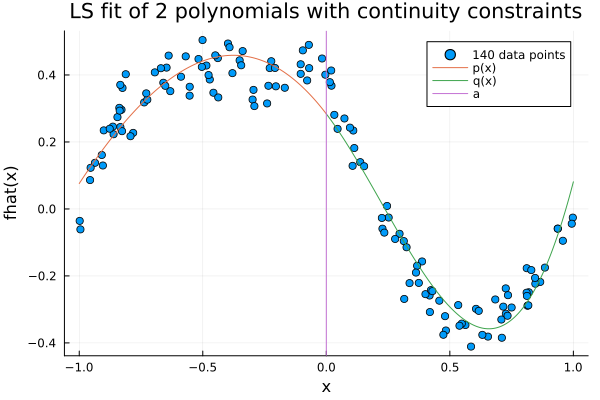

In [45]:
using Plots 

Nplot = 200;
xplot_left = linspace(-1,0,Nplot);
xplot_right = linspace(0,1,Nplot);

yplot_left = vandermonde(xplot_left, n)*xhat[1:n];
yplot_right = vandermonde(xplot_right, n)*xhat[n+1:end];

scatter(x, y, label="140 data points")
plot!(xplot_left, yplot_left, label="p(x)")
plot!(xplot_right, yplot_right , label="q(x)")
vline!([a], label="a")
plot!(title="LS fit of 2 polynomials with continuity constraints",
        xlabel="x",
        ylabel="fhat(x)")